# Week 3

In [2]:
from sklearn.datasets import load_breast_cancer 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [63]:
cancer.data.shape

(569, 30)

In [64]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [65]:
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [66]:
#To get a description of the semantic meaning of each feature, we can have a look at the feature_names attribute:
print("Features names: \n{}".format(cancer.feature_names))

Features names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [67]:
#Diabetes Dataset, regression model
from sklearn.datasets import load_diabetes
boston= load_diabetes()
print("Data shape:{}".format(boston.data.shape))

Data shape:(442, 10)


In [3]:
import mglearn
X, y = mglearn.datasets.load_extended_boston() 
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


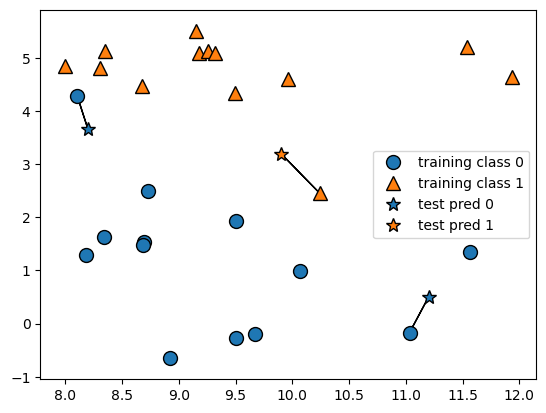

In [69]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

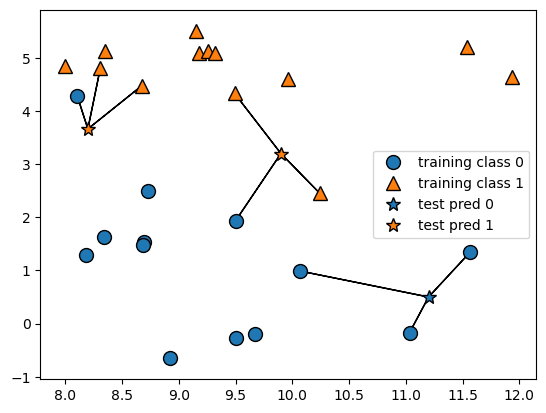

In [70]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [71]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test,y_train, y_test = train_test_split(X,y, random_state=0)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

Now, we fit the classifier using the training set. For KNeighborsClassifier this means storing the dataset, so we can compute neighbors during prediction:

In [73]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

To make predictions on the test data, we call the predict method. For each data point in the test set, this computes its nearest neighbors in the training set and finds the most common class among these:

In [74]:
print("Test set predictions: \n{}".format(clf.predict(X_test)))

Test set predictions: 
[1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the score method with the
test data together with the test labels:

In [75]:
print("Test set accuracy: \n{:.3f}".format(clf.score(X_test, y_test)))

Test set accuracy: 
0.857


We see that our model is about 86% accurate, meaning the model predicted the class correctly for 86% of the samples in the test dataset.

The following code produces the visualizations of the decision boundaries for one, three, and nine neighbors

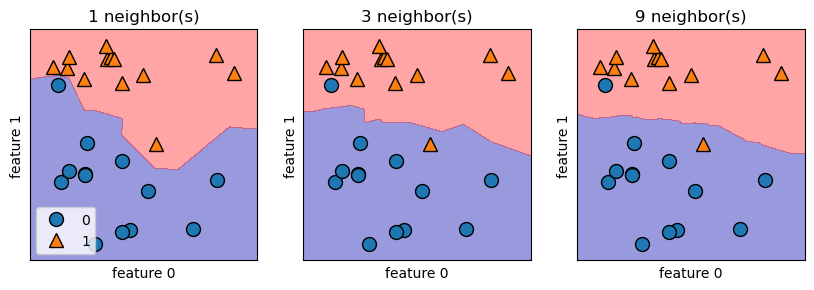

In [76]:
fig, axes = plt.subplots(1,3, figsize =(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    #the fit method returns the object self, so we can instatiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors =n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

Considering more and more neigh‐ bors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity and using many neighbors corre‐ sponds to low model complexity.

Let’s investigate whether we can confirm the connection between model complexity and generalization that we discussed earlier. We will do this on the real-world Breast Cancer dataset. 

In [77]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test, y_train,y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=66)

In [78]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

In [79]:
for n_neighbors in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    #record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


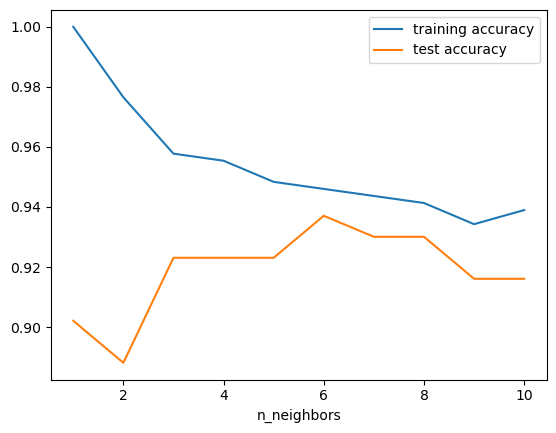

In [80]:
plt.plot(neighbors_settings, training_accuracy, label ="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label ="test accuracy")
plt.ylabel
plt.xlabel("n_neighbors")
plt.legend()



### k-neighbors regression
There is also a regression variant of the k-nearest neighbors algorithm.

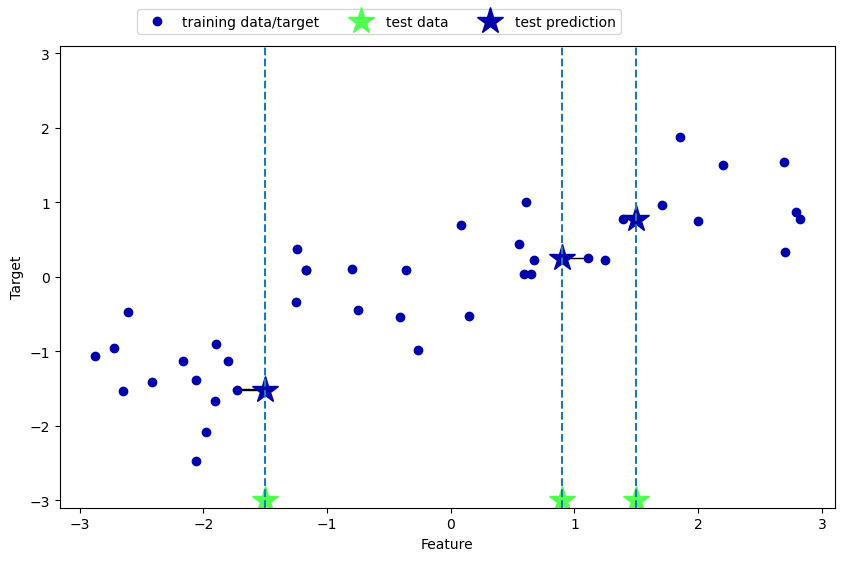

In [81]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

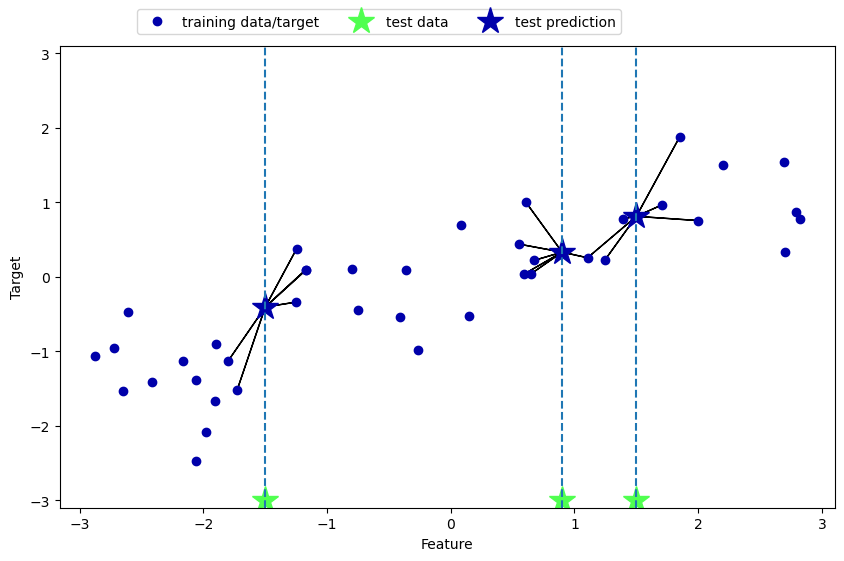

In [82]:
mglearn.plots.plot_knn_regression(n_neighbors = 6)

In [85]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
#Split the wave dataset into a training and a test set
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)
#instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=3)

In [89]:
print(" Test set prediction:{}".format(reg.predict(X_test)))

 Test set prediction:[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [92]:
print("Test set R^2: {:.3f}".format(reg.score(X_test,y_test)))

Test set R^2: 0.834


Here, the score is 0.83, which indicates a relatively good model fit.

#### Analyzing KNeighborsRegressor

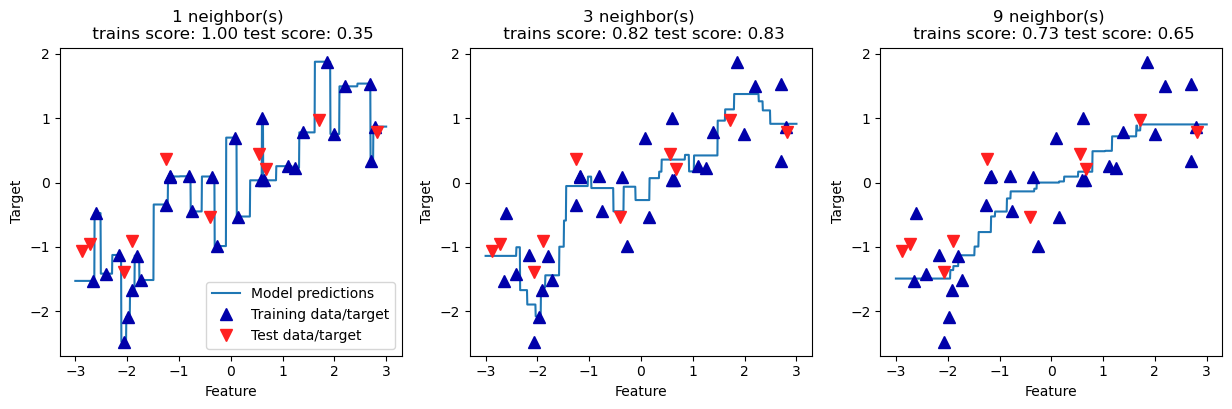

In [98]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
#create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,y_test,"v", c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s) \n trains score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train,y_train),
            reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc = "best")



As we can see from the plot, using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

#### Strengths, weaknesses, and parameters

In principle, there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.

Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow. When using the k-NN algorithm, it’s important to preprocess your data.

This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).

## Model Evaluation and Improvement

### Cross-validation
Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set. In cross- validation, the data is instead split repeatedly and multiple models are trained.

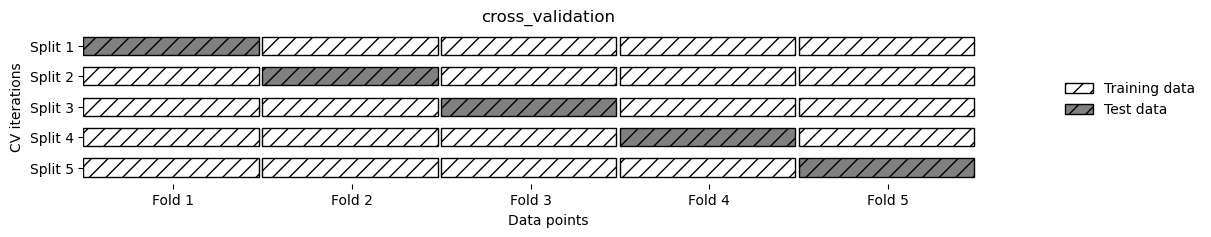

In [4]:
    mglearn.plots.plot_cross_validation()

When performing five-fold cross-validation, the data is first partitioned into five parts of (approximately) equal size, called folds. Next, a sequence of models is trained. The first model is trained using the first fold as the test set, and the remaining folds (2–5) are used as the training set. The model is built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then another model is built, this time using fold 2 as the test set and the data in folds 1, 3, 4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets. For each of these five splits of the data into training and test sets, we compute the accuracy.

#### Cross-Validation in scikit-learn